In [1]:
# Packages

import numpy as np
import matplotlib.pyplot as plt

$\frac{dV}{dt}=V-\frac{V^{3}}{3}-W+I; \frac{dW}{dt}=\frac{V+a-bW}{\tau}$

In [2]:
# Defining the equations

def FHN(t, X, a, b, tau, I):
    V, w = X
    dVdt = V - (V**3)/3 - w + I
    dwdt = (V + a - b*w)/tau
    return np.array([dVdt, dwdt])

In [3]:
# Simulation parameters

t0, t1 = 0, 100
dt = 0.01
t = np.arange(t0, t1, dt)

In [4]:
# Model paramters and initial conditions

a, b, tau, I = 0.7, 0.8, 12.5, 0.5
V0, w0 = -1, 0

In [5]:
# Foruth-order Runge-Kutta method

X = np.zeros((len(t), 2))
X[0, :] = np.array([V0, w0])
for i in range(len(t) - 1):
    k1 = dt*FHN(t[i], X[i, :], a, b, tau, I)
    k2 = dt*FHN(t[i] + dt/2, X[i, :] + k1/2, a, b, tau, I)
    k3 = dt*FHN(t[i] + dt/2, X[i, :] + k2/2, a, b, tau, I)
    k4 = dt*FHN(t[i] + dt, X[i, :] + k3, a, b, tau, I)
    X[i+1, :] = X[i, :] + (k1 + 2*k2 + 2*k3 + k4)/6

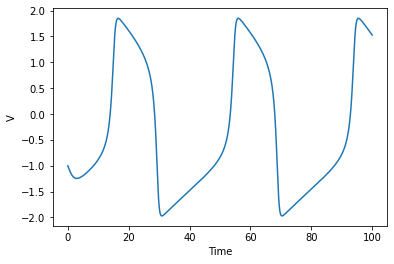

In [6]:
# Plotting the results

plt.plot(t, X[:, 0])
plt.xlabel('Time')
plt.ylabel('V')
plt.show()